In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist=input_data.read_data_sets('MNIST_DATA/',one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz


In [7]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
mnist.train.num_examples

55000

In [10]:
import matplotlib.pyplot as plt 

In [18]:
single_image=mnist.train.images[100].reshape(28,28)

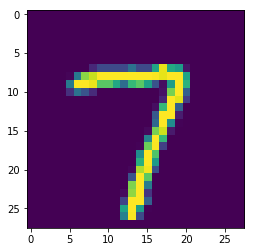

In [19]:
plt.imshow(single_image)

In [29]:
#Placeholder
x=tf.placeholder(tf.float32,shape=[None,784])
y=tf.placeholder(tf.float32,shape=[None,10])

In [30]:
#Variable
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [31]:
#Graph function
y_predict=tf.matmul(x,W)+b

In [40]:
#loss
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=y_predict))

In [43]:
#optimizer

train=tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cross_entropy)


In [44]:
#session
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for _ in range(1000):
        
        batch_x,batch_y=mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y:batch_y})
        
    pred_labels=tf.equal(tf.argmax(y,1),tf.argmax(y_predict,1))
    
    acc=tf.reduce_mean(tf.cast(pred_labels,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y:mnist.test.labels}))
        


0.9173
